In [4]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data Manipulation with Pandas

<span style="color:red">REF: Decaria Chapter 16</span>

In the previous lectures, we dove into NumPy and its ``ndarray`` object, which provides efficient storage and manipulation of dense typed arrays in Python. Here we'll build on this knowledge by looking at the data structures provided by the Pandas library. Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``. ``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we saw, NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks. While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us. Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

Here we will focus on the mechanics of using ``Series``, ``DataFrame``, and related structures effectively.

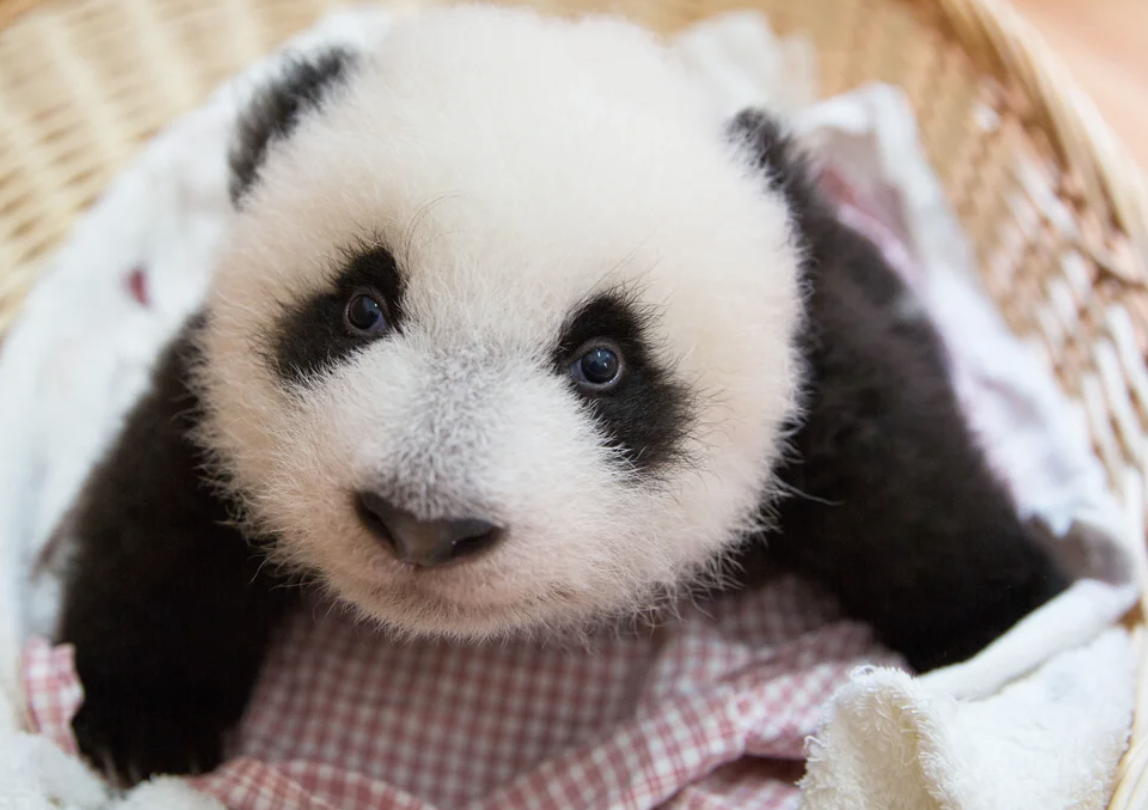

## Reading Data

Accessing data is a critical first step in any data science project. Many times data can be obtained in simple delimited (e.g., comma, tab) formats that are relatively easy to read in using functionality built into the Pandas module. There are other formats that data could be in (e.g., json, excel, netCDF, etc.), but we won't focus on those in this course.

Pandas Tutorial on Reading Data: https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html

Curated data sets are often easy to read as they have well defined column headers and don't require use of any special handling to successfully read them into a notebook.

## DataFrame
The data object that tabular data is read into with Pandas is known as a `DataFrame` (a commonly used variable name to represent this is `df`). A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of `Series` all sharing the same index. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays.

## Reading a File

There are a number of read methods available through Pandas, the most common of which is `read_csv`. This function has robust ability to read in comma (and other) delimited files quite easily. We'll currated data will have a single header row, use commas for delimiting different columns and have one type of data for each column.

In [15]:
path = ''
file = 'iris.csv'
df = pd.read_csv(path+file)

## Access Column Data

There are two methods to access a column of data (a Pandas Series) using a dictionary-like call or a "dot" method. To get the `'class'` column from the Iris dataset you would be able to do so via:

Dictionary-like

`df['class']`

or

"Dot" Method

`df.class`

To get the Numpy array from the series, call `.values` on the Series.

## Reading a New Dataset

Some datasets may contain metadata or additional information somewhere within a file you are attempting to read in. This will likely cause your data to be read in a manner that won't allow it to be successfully used. To demonstrate the use of keyword arguments in reading in a dataset, we'll use the Southern Oscillation Index (SOI) dataset, which is a measure related to El Nino events.

The raw dataset can be found at: https://www.cpc.ncep.noaa.gov/data/indices/soi

Sometimes the way we have read in similar data just won't work. We have to move to an alternative. What do you think are difficulties we would have reading in the SOI data set based on the output above and inspecting the data via the link?

In [20]:
df_soi = pd.read_fwf('https://www.cpc.ncep.noaa.gov/data/indices/soi')

## Accessing Rows and Columns

By setting the `index_col` keyword argument when reading in to our data, we can create some more logical values for us to use, which will make subsetting our data by rows easier.

To access a row, you'll need to use the `.loc` method on the DataFrame, then use the appropriate index values to access a given row or rows. Since we made the years the index values, we'll be able to use a year value as an integer value to pull it from the DataFrame. For example, if you had a DataFrame, `df`, with years as the index values, you would pull out 1956 as:

```python
df.loc[1956]

```

Then we can perform many of the same method calculations on a DataFrame or Series that we can with a Numpy array. For example, we can use the `.mean()` method for comuting the mean values.

## Add Calculated Column
Let's calculate the average SOI value for each year and add it as a new column to the DataFrame.

We can use either methods built into the DataFrame itself or use Numpy functions to aid in the calculation. If we wanted to perform a calculation for each row we can add the keyword argument `axis=1` or if we wanted to do it for each column, then we would add the keyword argument `axis=0` and we would implicitly loop over each row or column, respectively.

Let's compute the average for each year and add a new column to our DataFrame called `avg`.

## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data.

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

## Output Refined Datasets
We don't ever want to change the raw dataset, so that we can always go back to it in case we need to. Other times we don't want to have to use the time or computer memory to read in ALL of the data, if we are only working with a small subset of rows or columns.

So once you have your refined dataset, you may want to save it in a format that you can quickly read it back in to a notebook.

As long as your dataset is a DataFrame, there are methods to save in similar formats that Pandas can read including, comma deliminated (csv), excel, and JSON.

Let's save our refined SOI dataset as a comma deliminated file with our added columns.

In [ ]:
df_soi.to_csv('soi_dataset.csv')

## Reading Data Messy Data

Data are not necessarily messy on purpose, but that the nature of the data itself bring complications. For example, you may have any combination of missing data or mixed data types in a column that are non-standard values. So how do we handle this?

https://www.rcc-acis.org/docs_webservices.html#title36

Data Issues:
* No header row
* Missing values labeled as `M`
* Precipitation, Snow, and Snowdepth can have trace values `T`
* Use dates as an index
* Parse date values to be datetime-like and not strings

In [22]:
df = pd.read_csv('http://data.rcc-acis.org/StnData?sid=ordthr&sdate=por&edate=por'
                 '&elems=mint,avgt,maxt,pcpn,snow,snwd&output=csv')

Inspect the last couple of rows with the `.tail()` method.

For example, the following will give you the last ten rows of your DataFrame,
```python
df.tail(10)
```

Hmmm, we still have the trace (`T`) precipitation amounts in there. Let's go ahead and use the `.replace()` method to put in a very small value for `T`, to ensure we can have a fully numeric column of data.

The format of the replace method is:
```python
df.replace(old_value, new_value)
```

And then we'll want to force the data to be floating point values. Since there were `T`'s in the precipitation, snow, and snow depth columns, all of the values are forced to be strings, so you won't be able to do any calculations on them until you make them integer or floating point values. Here we want floating point values because precipitation can be in non-integer values.

## Subest using Datetime

Since we did the work to parse the dates of our file and made them the index value, we can more easily subset our DataFrame for any particular timeframe using the datetime module.

Let's grab the data from 1991 through 2000.

In [ ]:
ltm_data = 

## Grouby Operations

Pandas has some very extensive methods and functions for performing many high-level operations. One really useful one is the `groupby()` method. Here we have subset our data for a decade, but what if we wanted to know what was the average maximum temperature over that decade period?

If we only had our data stored in a Numpy array we would have to do some creative subsetting in order to get the right data. We would likely be more than a little flumoxed by having a few leap years in there, which would throw off any easy methods for getting the right data.

The Pandas `grouby` method will allow us to group by one or more elements. So to group by the day of the year, we would need to group by both the month and the day. Here we can exploit our index values being dates and use the abiliy to pull both the month and the data from those index values to help us perform our `groupby()` operations.

To get the month: `df.index.month`

To get the day: `df.index.day`

This is similar to working with a `datetime` object and getting out the individual pieces of information. Here we just call our DataFrame index values using the "dot" method and since those are datetime-like objects, then we can simply call the appropriate attribute values from those objects.

To perform the group by for a single value:

```python
df.groupby(value1)
```

or for two variables:

```python
df.groupby([value1, value2])
```

Where `value1` and `value2` are each arrays that represent the row information you wish to group by.

In [ ]:
gb = ltm_data.groupby([])

## Rolling Average

Pandas also provides a simple method for calculating a rolling average. For example, if you wanted to computing a seven day rolling average with a minimum period in an average of one:

```python
df.rolling(window=7, min_periods=1).mean()
```

Here the `.rolling()` method creates a copy of the DataFrame, organizing the data as needed, but to get the actual rolling mean, you would still need to perform the `.mean()` calulcation.

In [ ]:
maxtemp_rolling_avg = 

## Plotting

Now let's use our plotting knowledge to plot some of our grouped values.

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

ax.plot(range(1, 367), maxtemp_rolling_avg, label='Rolling MaxT', color='red')


ax.set_title('1991-2000 Rolling Average Max Temp KORD')
ax.set_ylabel('Temperature (F)')
ax.set_xlabel('Julian Day of Year')

ax.legend()

plt.show()